In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck


In [38]:
def analyze_csv(df):
    cols_id = ['id','control','cultivar']
    cols_years = [x for x in df.columns if x not in cols_id]
    df_melt = df.melt(id_vars=cols_id, value_vars=cols_years, var_name='ano', value_name='quantidade')
    df_melt['ano'] = df_melt['ano'].astype(int)
    df_melt['quantidade'] = df_melt['quantidade'].apply(lambda x: x if str(x).isnumeric() else 0)
    df_melt['quantidade'] = df_melt['quantidade'].astype(int, )
    df_melt = df_melt[df_melt['ano']>=2007]

    # print(df_melt['control'].apply(lambda x: x.split('_')[0]).unique())
    df_melt = df_melt[(df_melt['control'].str.startswith('ti_')) | (df_melt['control'].str.startswith('br_')) | (df_melt['control'] == 'sc')]
    top_cultivar=df_melt.groupby(['control']).agg({'quantidade': 'sum'}).sort_values(by='quantidade', ascending=False).head(10)['quantidade'].index.to_list()
    g_r = sns.lineplot(data=df_melt[df_melt['control'].isin(top_cultivar)], x='ano', y='quantidade', hue='control', style='control',  dashes=False)
    #g_r.set(yscale="log", xlabel='Year', ylabel='Quant')
    g_r.yaxis.set_major_formatter(tck.StrMethodFormatter("{x:,.2f}"))
    sns.set_style('darkgrid')
    sns.set(rc={'figure.figsize':(15,8)})
    plt.title('Quantidade em kg de vinho processado')
    sns.move_legend(g_r, "upper left", bbox_to_anchor=(1, 1))


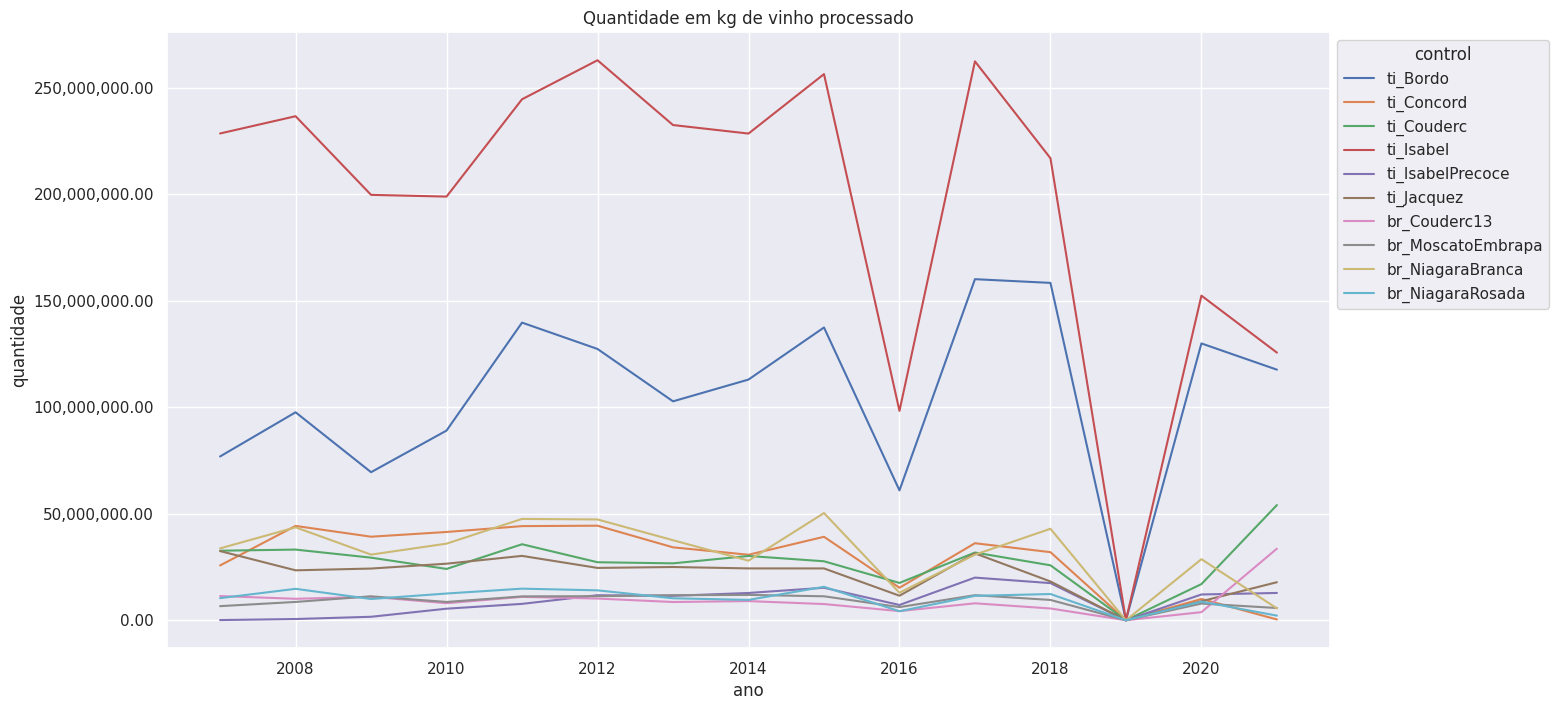

In [39]:
df1 = pd.read_csv('ProcessaAmericanas.csv', sep=';')
analyze_csv(df1)

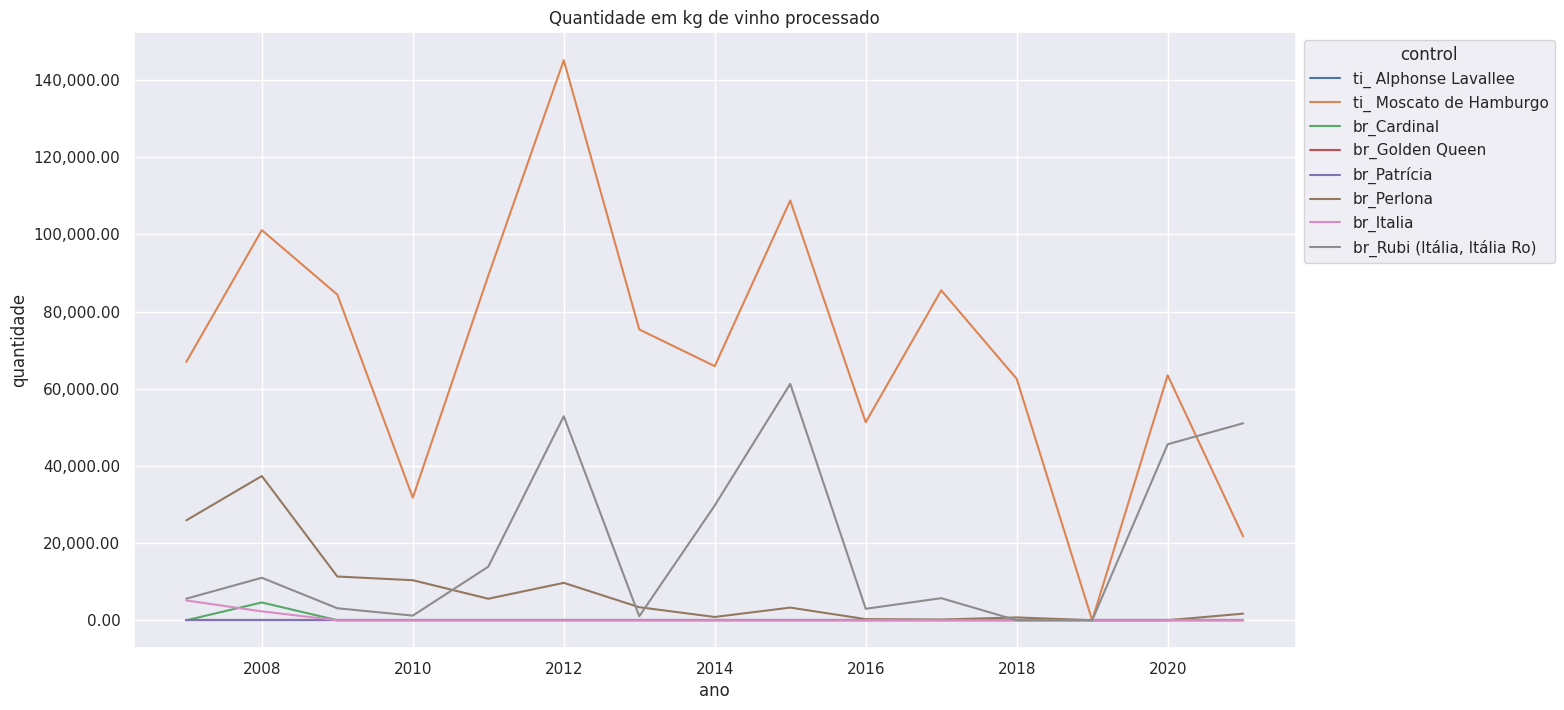

In [40]:
df2 = pd.read_csv('ProcessaMesa.csv', sep=';')
analyze_csv(df2)

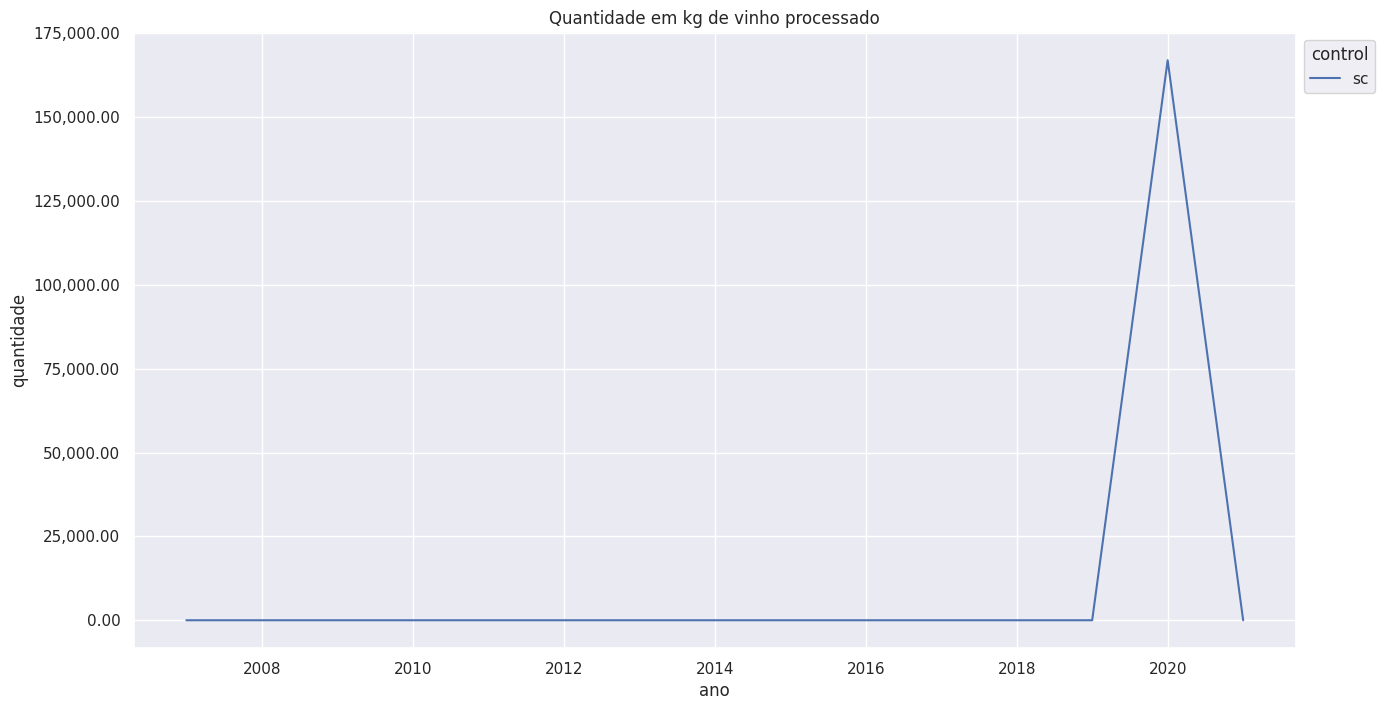

In [41]:
df3 = pd.read_csv('ProcessaSemclass.csv', sep=';')
analyze_csv(df3)

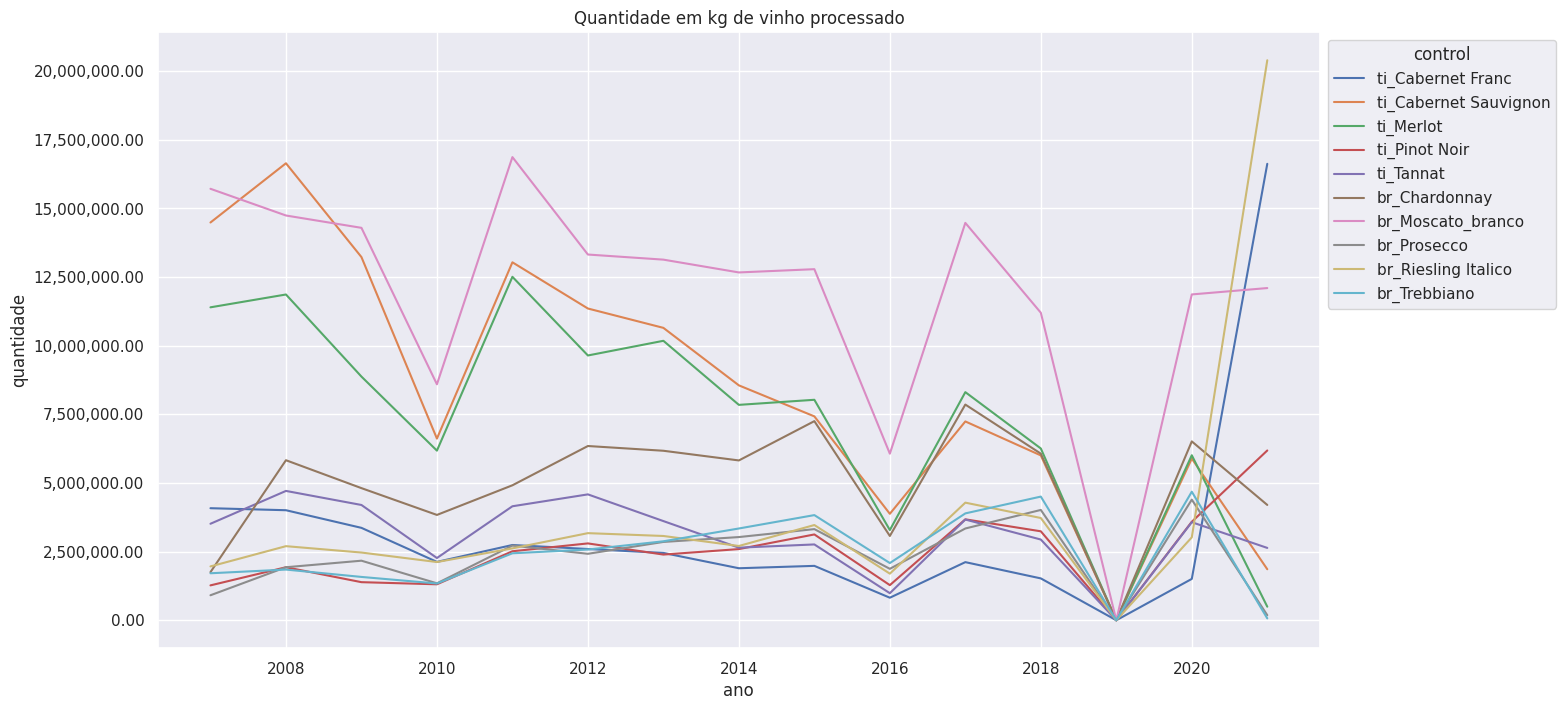

In [42]:
df4 = pd.read_csv('ProcessaViniferas.csv', sep='\t')
analyze_csv(df4)